# Song Analysis with Power BI

# Data Cleaning and Preparation:
 - Clean and preprocess the dataset, handling missing values or outliers.
 - Convert relevant columns to appropriate data types.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
data = pd.read_excel(r'D:/Mentorness Internship/Mentorness/DA/Project 2 - Songs Analysis/Songs.xlsx')

# Display the first few rows of the dataset to understand its structure
print(data.head())


   Unnamed: 0     video_id channelTitle  \
0           0  F44TK5EHCRo     T-Series   
1           1  adx8Rsjp-c0     T-Series   
2           2  36nQLyrR7Sw     T-Series   
3           3  TKbifi5AMQo     T-Series   
4           4  NNA21SoGqss     T-Series   

                                               title  \
0  RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...   
1  TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...   
2  ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...   
3  HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...   
4  Har Har Mahadev (Lyrical Video): Sachet Tandon...   

                                         description  \
0  Presenting the song "RAFTA RAFTA (Lo-Fi Mix)" ...   
1  Presenting the song "TUM HO MERA PYAR (Lo-Fi M...   
2  Presenting the song "ISHQ HOTHON SE (Lo-Fi Mix...   
3  Presenting the song "HUMKO PYAR HUA (Lo-Fi Mix...   
4  T-Series Presents "Har Har Mahadev (Lyrical Vi...   

                                                tags           publ

In [38]:
# Handling Duration Column: Convert to numeric, handle unexpected values
data['duration'] = pd.to_numeric(data['duration'].str.extract(r'(\d+)').fillna(0)[0])

# Explicitly define categorical columns
categorical_columns = ['definition', 'caption']

# Fill missing values for categorical columns with mode
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check data types and missing values again
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19345 non-null  int64 
 1   video_id       19345 non-null  object
 2   channelTitle   19345 non-null  object
 3   title          19345 non-null  object
 4   description    19342 non-null  object
 5   tags           19345 non-null  object
 6   publishedAt    19345 non-null  object
 7   viewCount      19345 non-null  int64 
 8   likeCount      19345 non-null  int64 
 9   favoriteCount  19345 non-null  int64 
 10  commentCount   19345 non-null  int64 
 11  duration       19345 non-null  int64 
 12  definition     19345 non-null  object
 13  caption        19345 non-null  bool  
dtypes: bool(1), int64(6), object(7)
memory usage: 1.9+ MB
None
         Unnamed: 0     viewCount     likeCount  favoriteCount   commentCount  \
count  19345.000000  1.934500e+04  1.934500e+04        193

# Exploratory Data Analysis (EDA):
 - Explore patterns and distributions in view counts, like counts, and comments.
 - Identify trends in the popularity and engagement of YouTube song videos

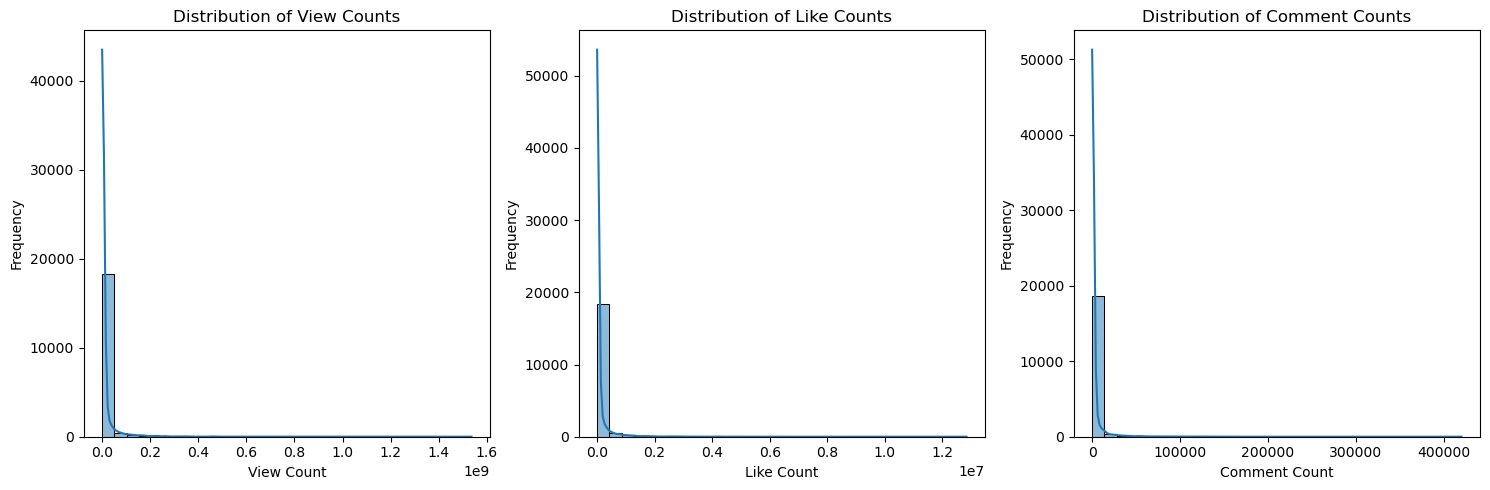

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['viewCount'], bins=30, kde=True)
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(data['likeCount'], bins=30, kde=True)
plt.title('Distribution of Like Counts')
plt.xlabel('Like Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data['commentCount'], bins=30, kde=True)
plt.title('Distribution of Comment Counts')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Content and Channel Analysis:
 - Analyze the distribution of videos across different channels.
 - Identify popular tags and their correlation with view counts.

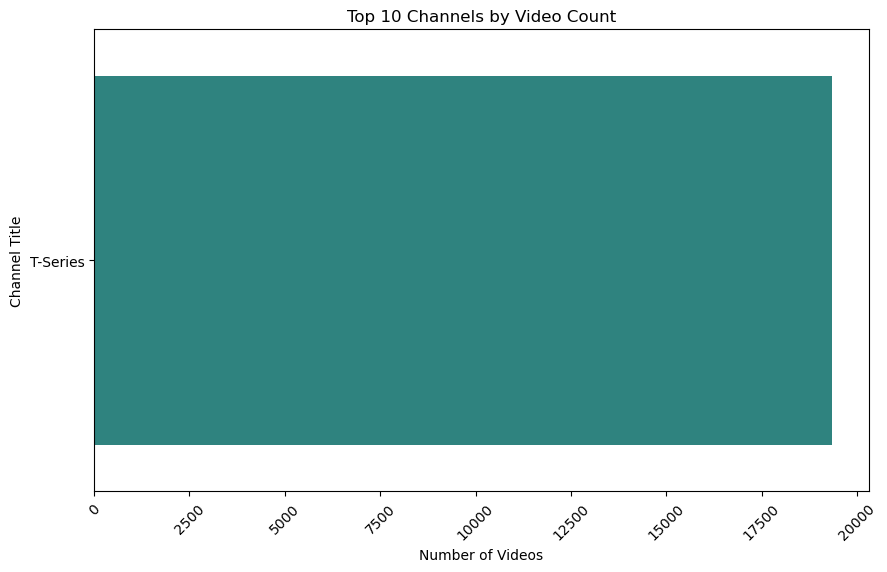

In [26]:
# Distribution of videos across channels
channel_counts = data['channelTitle'].value_counts().head(10).sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.values, y=channel_counts.index, palette='viridis')
plt.title('Top 10 Channels by Video Count')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Title')
plt.xticks(rotation=45)
plt.show()

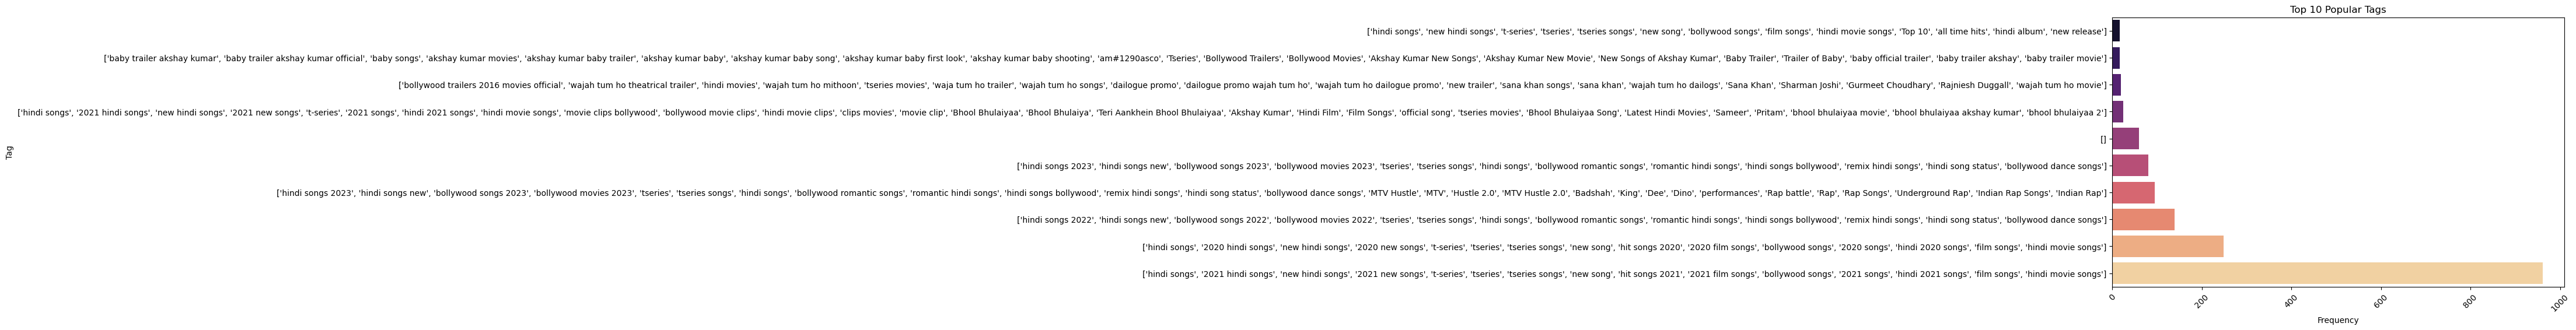

In [27]:
# Extract and analyze popular tags
tags = data['tags'].str.split('|', expand=True).stack().value_counts().head(10).sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=tags.values, y=tags.index, palette='magma')
plt.title('Top 10 Popular Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()

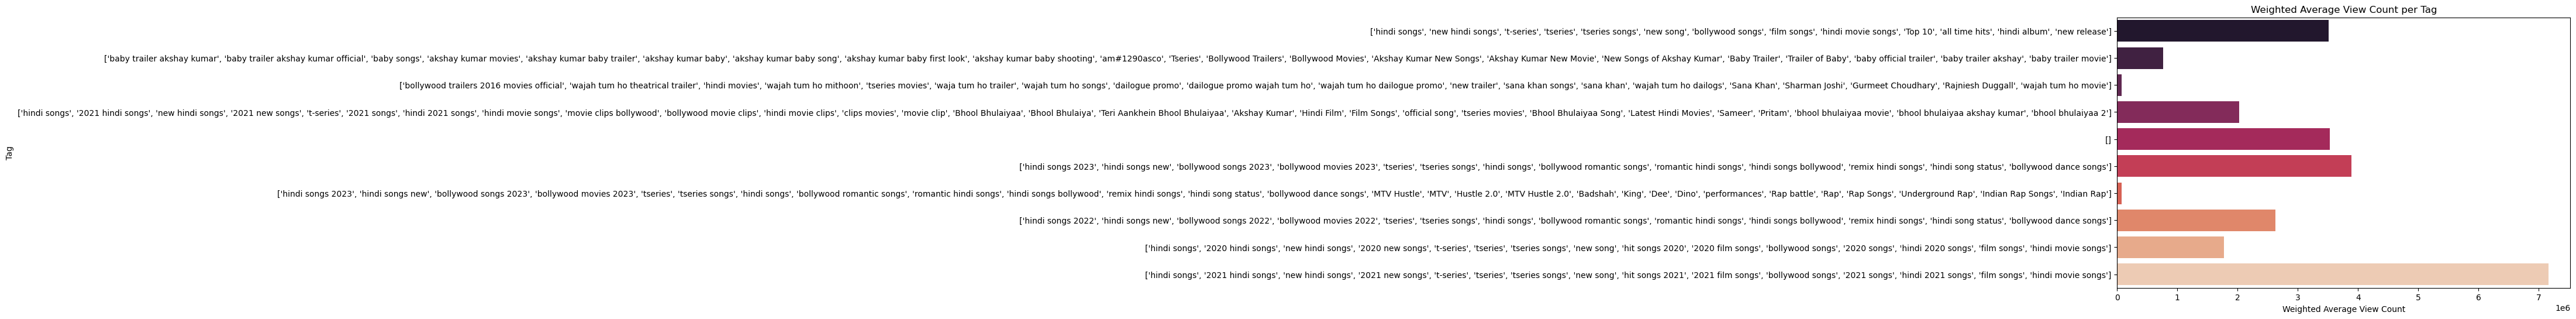

In [28]:
# Calculate weighted average view count per tag
tag_view_weighted_avg = {}
for tag in tags.index:
    tag_videos = data[data['tags'].str.contains(tag, regex=False)]
    total_views = tag_videos['viewCount'].sum()
    total_videos = len(tag_videos)
    if total_videos != 0:
        tag_view_weighted_avg[tag] = total_views / total_videos
    else:
        tag_view_weighted_avg[tag] = 0

# Plot the weighted average view count per tag
plt.figure(figsize=(10, 6))
sns.barplot(x=list(tag_view_weighted_avg.values()), y=list(tag_view_weighted_avg.keys()), palette='rocket')
plt.title('Weighted Average View Count per Tag')
plt.xlabel('Weighted Average View Count')
plt.ylabel('Tag')
plt.show()


# Temporal Trends:
 - Explore how YouTube song video metrics vary over time.
 - Identify peak publishing times and their impact on engagement.

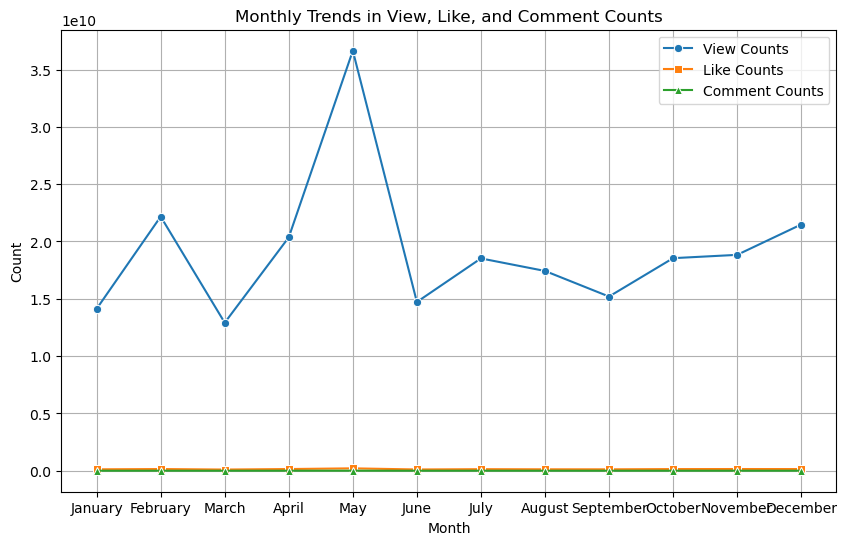

In [32]:
# Convert 'publishedAt' column to datetime
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

# Calculate monthly trends
data['published_month'] = data['publishedAt'].dt.month
monthly_data = data.groupby('published_month').agg({'viewCount': 'sum', 'likeCount': 'sum', 'commentCount': 'sum'}).reset_index()

# Plot monthly trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data, x='published_month', y='viewCount', label='View Counts', marker='o')
sns.lineplot(data=monthly_data, x='published_month', y='likeCount', label='Like Counts', marker='s')
sns.lineplot(data=monthly_data, x='published_month', y='commentCount', label='Comment Counts', marker='^')

plt.title('Monthly Trends in View, Like, and Comment Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), month_names)  # Set month names as x-axis ticks
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()


# User Engagement Insights:
 - Investigate relationships between likes, comments, and views.
 - Identify factors influencing user engagement with YouTube song videos.

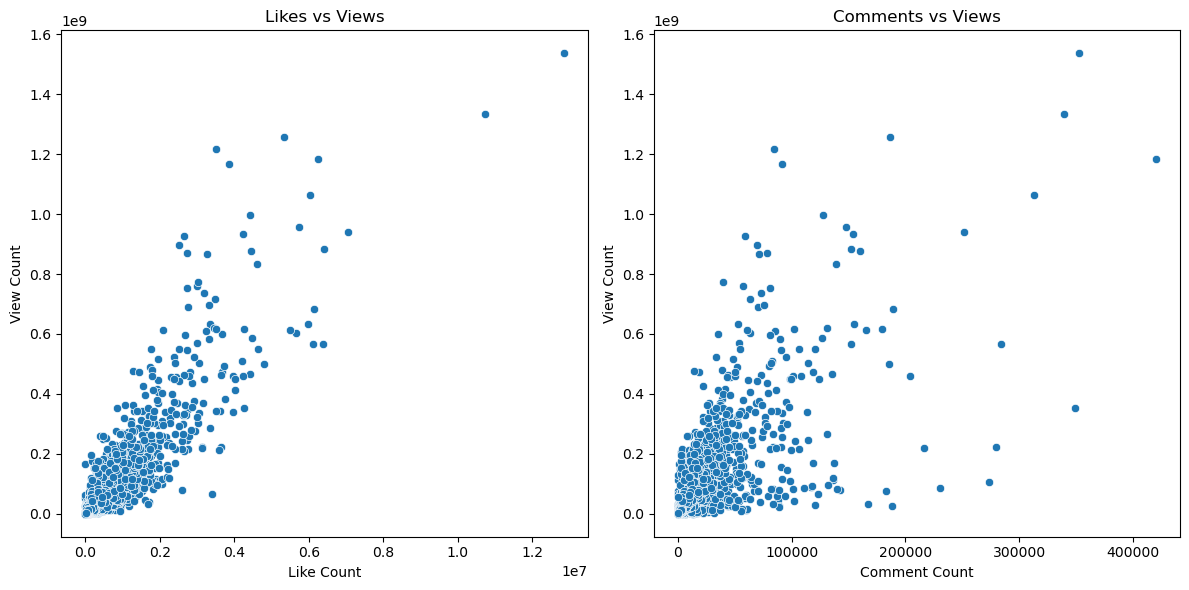

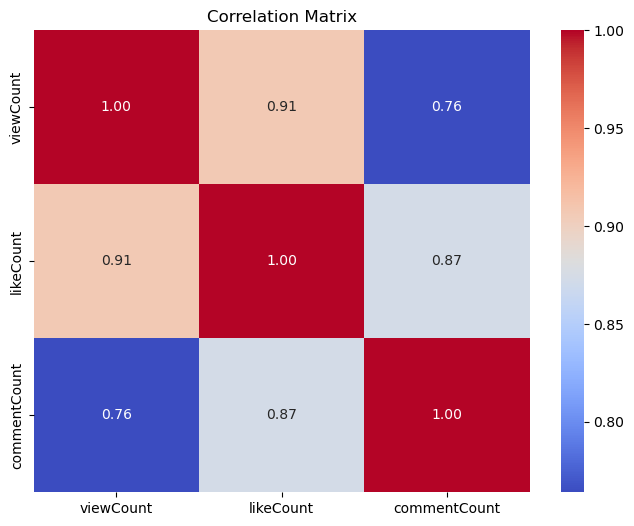

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='likeCount', y='viewCount', data=data)
plt.title('Likes vs Views')
plt.xlabel('Like Count')
plt.ylabel('View Count')

plt.subplot(1, 2, 2)
sns.scatterplot(x='commentCount', y='viewCount', data=data)
plt.title('Comments vs Views')
plt.xlabel('Comment Count')
plt.ylabel('View Count')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data[['viewCount', 'likeCount', 'commentCount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
